# Decision Trees
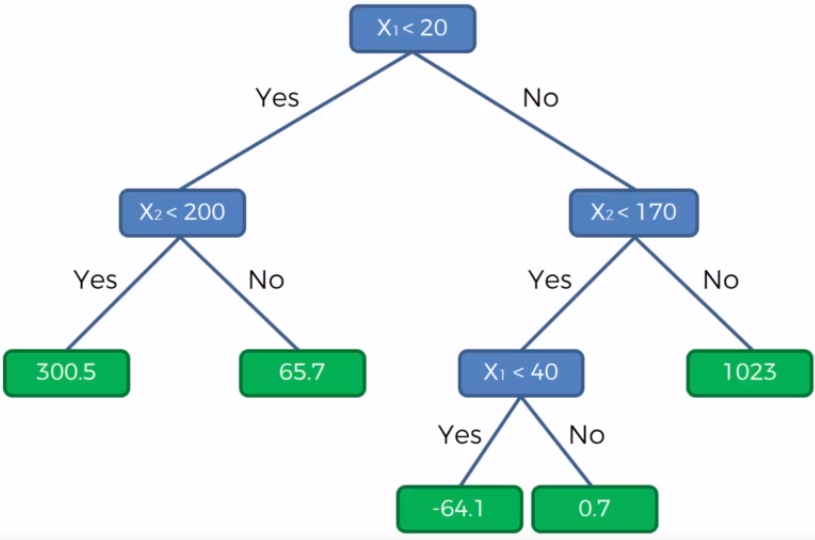

## Getting Started

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [57]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [58]:
x = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values

In [59]:
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [60]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [61]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

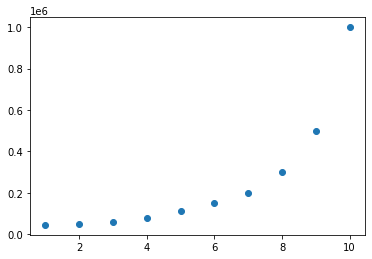

In [62]:
plt.scatter(x, y)
plt.show()

## Splitting

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Feature Scaling
not required in this case

## Training

In [64]:
modelDT = DecisionTreeRegressor(random_state=0)
modelDT.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [65]:
print(modelDT.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


## Tree Visualization

[Text(0.7083333333333334, 0.9166666666666666, 'X[0] <= 9.0\nsquared_error = 88437109375.0\nsamples = 8\nvalue = 241875.0'),
 Text(0.625, 0.75, 'X[0] <= 6.5\nsquared_error = 7233673469.388\nsamples = 7\nvalue = 133571.429'),
 Text(0.4166666666666667, 0.5833333333333334, 'X[0] <= 4.5\nsquared_error = 1536000000.0\nsamples = 5\nvalue = 87000.0'),
 Text(0.25, 0.4166666666666667, 'X[0] <= 3.0\nsquared_error = 238888888.889\nsamples = 3\nvalue = 58333.333'),
 Text(0.16666666666666666, 0.25, 'X[0] <= 1.5\nsquared_error = 6250000.0\nsamples = 2\nvalue = 47500.0'),
 Text(0.08333333333333333, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 45000.0'),
 Text(0.25, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 50000.0'),
 Text(0.3333333333333333, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 80000.0'),
 Text(0.5833333333333334, 0.4166666666666667, 'X[0] <= 5.5\nsquared_error = 400000000.0\nsamples = 2\nvalue = 130000.0'),
 Text(0.5, 0.25, 'squared_error = 0.0\ns

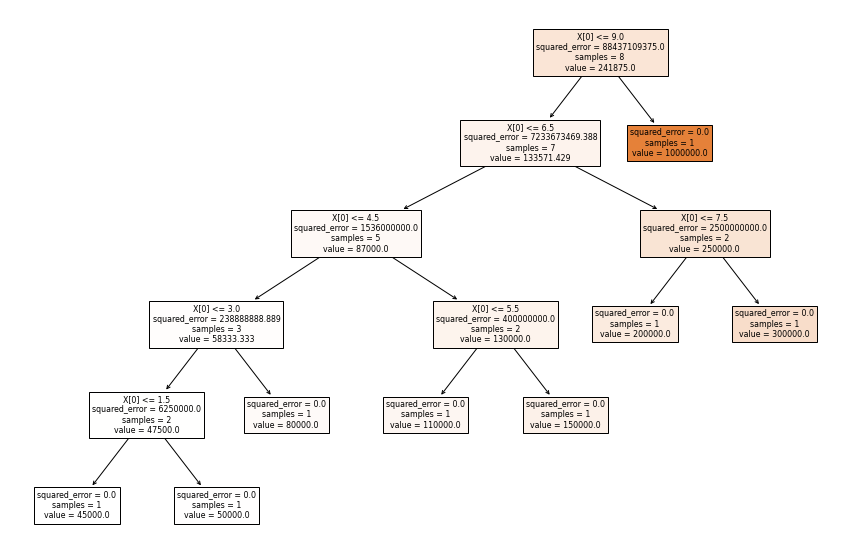

In [66]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(modelDT, filled=True)

## Prediction

In [67]:
y_pred = modelDT.predict([[6.5]])
y_pred

array([150000.])

## Mean Squared Error

In [68]:
y_pred = modelDT.predict(x_test)
regression_model_mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:\t', math.sqrt(regression_model_mse))
print('R Squared Value:\t', modelDT.score(x, y))

Mean Squared Error:	 141598.02258506295
R Squared Value:	 0.9502865342833854


## Visualization

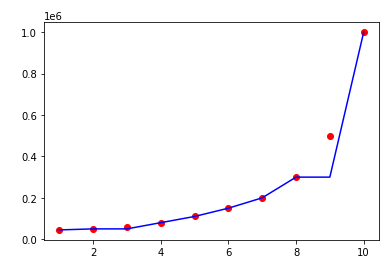

In [69]:
plt.scatter(x, y, color='red')
plt.plot(x, modelDT.predict(x), color='blue')
plt.title('Truth or Bluff (Decision tree Regression', color='white')
plt.xlabel('Position level', color='white')
plt.ylabel('Salary', color='white')
plt.show()